#**[Can AI Predict Who Survived the Titanic's Sinking?](https://www.sciencebuddies.org/science-fair-projects/project_ideas/ArtificialIntelligence_p009/artificial-intelligence/KNN-titanic-survivor)**

This notebook was developed by Science Buddies [www.sciencebuddies.org](https://www.sciencebuddies.org/) as part of a science project to allow students to explore and learn about artificial intelligence. For personal use, this notebook can be downloaded and modified with attribution. For all other uses, please see our [Terms and Conditions of Fair Use](https://www.sciencebuddies.org/about/terms-and-conditions-of-fair-use).  

**Troubleshooting tips**
*   Read the written instructions at Science Buddies and the text and comments on this page carefully.
*   If you make changes that break the code, you can download a fresh copy of this notebook and start over.

*   If you are using this notebook for a science project and need help, visit our [Ask an Expert](https://www.sciencebuddies.org/science-fair-projects/ask-an-expert-intro) forum for assistance.

## **How To Use This Notebook**

This notebook contains text fields, like this one, that give you information about the project and instructions.

In [1]:
# There are also code blocks, like this one.

# The green text in a code block are comments. Comments are descriptions of what the code does.

# The non-green text in a code block is the Python code. Click on the triangle in the top left corner to run this code block.

print("Congratulations, you ran a code block! Try changing the text in the code and running it again.")

Congratulations, you ran a code block! Try changing the text in the code and running it again.


##**Importing Libraries**
We will start this science project by importing some necessary libraries. These libraries contain functions that we will be using to create and display our maze. The comments tell you what each libary is for.

In [2]:
# The pandas library allows us to work with data like spreadsheets.
# It helps us organize, clean, and analyze data easily
import pandas as pd

# This function helps us convert categorical data into numerical values.
# It assigns a unique integer to each category, making it suitable for many algorithms that require numerical input
from sklearn.preprocessing import LabelEncoder

# We often want to test how well our "smart" programs work.
# This library helps us split our data into parts: one for teaching the program and another for testing it.
from sklearn.model_selection import train_test_split

# A machine learning algorithm used for classification tasks. It makes predictions based on the majority class
# among its k-nearest neighbors in the feature space.
from sklearn.neighbors import KNeighborsClassifier

# A metric used to evaluate the performance of classification models by measuring the proportion of correctly
# predicted instances in the total instances
from sklearn.metrics import accuracy_score

# For doing math and working with numbers, this library is like a super calculator.
# It's great for handling big sets of numbers and doing fancy math operations.
import numpy as np

# When we want to draw graphs and charts to show our data visually, we use this.
# It helps us see patterns and trends in the data.
import matplotlib.pyplot as plt

# Imagine you have a lot of information about people, like their height, weight, age, etc.
# Sometimes there's too much information, and we use this to simplify it while keeping the important stuff
from sklearn.decomposition import PCA

print("You have imported all the libraries")

You have imported all the libraries


## Loading the Data into a Pandas Dataframe

In [3]:
# Load the CSV file into a pandas DataFrame
data = pd.read_csv("https://www.sciencebuddies.org/ai/colab/titanic.csv?t=AQX1iBGMHO29cX9umS5P6VLF-rg7jl-7K2RYrVD23rGwcg")

In [4]:
# We can see what the data frame looks like by using the head function
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# We can see the unique values of each column by using the unique() function
data['Survived'].unique()

# Try testing this out with different columns!


array([0, 1], dtype=int64)

## Preprocessing the Dataset

We will first drop features that we think will be uninformative for modeling. In our case, we will be dropping passenger ID, name, ticket number, and cabin information. These features do not provide meaningful insights, as passenger ID is often just a unique identifier without any inherent significance in the context of analysis. Similarly, name, ticket number, and cabin information doesn't have a clear relationship as to whether a passenger survived or not, so it might be considered irrelavant or redundant.

In [6]:
# List the columns that you want to drop, this would be Name, Ticket, Cabin, and Embarked
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'] # Add in the rest of the features

# Drop the specified columns
data.drop(columns=columns_to_drop, inplace=True)

# Let's check if our specified columns are no longer there!
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


Since KNN is a distance-based algorithm, it is crucial to normalize or scale the features to ensure that all features contribute equally to the distance calculations. Learn more about data scaling [here](https://www.youtube.com/watch?v=n9KeJLGwW0U).

In [7]:
# We will be scaling our numerical variables, which in this case would be Age, SibSp, Parch, and Fare

# Identify the numerical feature columns you want to normalize
numerical_columns = ['Age', 'SibSp', 'Parch', 'Fare'] # Add in the rest of the features

# Make sure to type the column names exactly as given in the dataframe above

# Apply min-max scaling to the selected numerical feature columns
data[numerical_columns] = (data[numerical_columns] - data[numerical_columns].min()) / (data[numerical_columns].max() - data[numerical_columns].min())

In [8]:
# Let's see what our normalization did! Do you remember which function we used to look at the data frame?
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,0.271174,0.125,0.0,0.014151
1,1,1,female,0.472229,0.125,0.0,0.139136
2,1,3,female,0.321438,0.000,0.0,0.015469
3,1,1,female,0.434531,0.125,0.0,0.103644
4,0,3,male,0.434531,0.000,0.0,0.015713


Amazing! As we can now see, all of the numerical variables are now between 0 and 1. Next, we need to encode our categorical variable since most machine learning algorithms are designed to operate on numerical data. A categorical variable is a type of information that puts things into different groups. It's like sorting things based on their qualities or characteristics. For example, you can sort animals into categories like "mammals", "birds", or "reptiles." Categorical variables don't have number; they just have different labels or names for each group. Learn more about label and one hot encoding [here](https://www.youtube.com/watch?v=589nCGeWG1w).

In [9]:
# Let's see the options for Sex
data['Sex'].unique()

array(['male', 'female'], dtype=object)

As we can see, there are only two options for Sex so we will be using Label encoding. We can also see that the other categorical variables like Survived and Pclass have already been label encoded for us, so we don't need to do further preprocessing with those features.

In [10]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the target data using label encoding
data['Sex'] = label_encoder.fit_transform(data['Sex'])

# Let's check what the dataframe looks like now!
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,0.271174,0.125,0.0,0.014151
1,1,1,0,0.472229,0.125,0.0,0.139136
2,1,3,0,0.321438,0.000,0.0,0.015469
3,1,1,0,0.434531,0.125,0.0,0.103644
4,0,3,1,0.434531,0.000,0.0,0.015713


Next, we want to drop NaN values (Not a Number). NaN values often indicate missing or incomplete data. Inaccurate or incomplete data can often lead to biased or incorrect analysis results or machine learning model predictions. By removing rows or columns with NaN values, you improve the overall quality and integrity of your dataset.

In [11]:
# Show the number of rows before dropping NaN values
rows_before = data.shape[0]
print("Number of rows before dropping:", rows_before)

# Drop both rows and columns with NaN value
data.dropna(inplace=True)

# Show the number of rows after dropping NaN values
rows_after = data.shape[0]
print("Number of rows after dropping:", rows_after)

data.head()

Number of rows before dropping: 891
Number of rows after dropping: 714


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,0.271174,0.125,0.0,0.014151
1,1,1,0,0.472229,0.125,0.0,0.139136
2,1,3,0,0.321438,0.000,0.0,0.015469
3,1,1,0,0.434531,0.125,0.0,0.103644
4,0,3,1,0.434531,0.000,0.0,0.015713


Train-Test Split: Split the preprocessed data into training and testing datasets. The training dataset is used to train the KNN model, and the testing dataset is used to evaluate its performance on unseen data. Learn more about why we split datasets into train and test [here](https://www.youtube.com/watch?v=dSCFk168vmo).

In [12]:
# Extract the feature data by removing the 'Survived' column. 'axis=1' indicates we are dropping a column
X = data.drop('Survived', axis=1)

# Assign the 'Survived' column (target variable) to the variable 'y'. This will be the value we aim to predict
y = data['Survived']

In [13]:
# You can see what X and y look like by simply using the print function
print(X)

     Pclass  Sex       Age  SibSp     Parch      Fare
0         3    1  0.271174  0.125  0.000000  0.014151
1         1    0  0.472229  0.125  0.000000  0.139136
2         3    0  0.321438  0.000  0.000000  0.015469
3         1    0  0.434531  0.125  0.000000  0.103644
4         3    1  0.434531  0.000  0.000000  0.015713
..      ...  ...       ...    ...       ...       ...
885       3    0  0.484795  0.000  0.833333  0.056848
886       2    1  0.334004  0.000  0.000000  0.025374
887       1    0  0.233476  0.000  0.000000  0.058556
889       1    1  0.321438  0.000  0.000000  0.058556
890       3    1  0.396833  0.000  0.000000  0.015127

[714 rows x 6 columns]


In [14]:
# Try printing out y


In [15]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (571, 6)
X_test shape: (143, 6)
y_train shape: (571,)
y_test shape: (143,)


## Training the Model

Training the K-Nearest Neighbors Model

In [16]:
# Set the value of 'k', which represents the number of neighbors to consider for each prediction
# We set the default value of k to 5, but it can be almost any number
k = 5

# Create an instance of the KNN classifier
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the KNN classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Evaluate the performance of the KNN model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7622377622377622


Graphing using Principal Component Analysis (PCA). PCA is a method to simplify complex data by focusing on essential patterns while reducing noise and dimensions. It helps visualize data and save space by identifying key directions (principal components) that capture the most variation. Use PCA when you need clearer insights from data with many features. Learn more about PCA [here](https://www.youtube.com/watch?v=HMOI_lkzW08&ab_channel=StatQuestwithJoshStarmer).

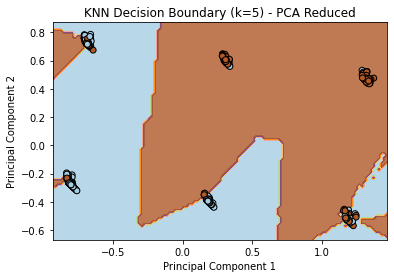

In [17]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X_pca, y)

# Create a meshgrid to plot the decision boundary
h = 0.02
x_min, x_max = X_pca[:, 0].min() - 0.1, X_pca[:, 0].max() + 0.1
y_min, y_max = X_pca[:, 1].min() - 0.1, X_pca[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict on the meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'KNN Decision Boundary (k={k}) - PCA Reduced')
plt.show()

This graph visually represents how the KNN classifier's decision boundary looks in the reduced two-dimensional space obtained through PCA. It shows how the classifier separates the classes based on the reduced features, and the scatter plot provides insight into the distribution of the original data points and their assigned classes.

We will now compare different neighbor sizes using a loop. By testing the model with varying numbers of neighbors, we can find the optimal value that leads to accurate predictions. The loop iterates through different neighbor values and evaluates accuracy, a metric that measures how well the model predicts outcomes.

In [18]:
# Define a range of values for the number of neighbors
neighbors = np.arange(1, 100)

# Initialize an empty list to store accuracy scores
accuracy_scores = []

# Iterate over different values of neighbors
for n in neighbors:
    # Create an instance of the KNN classifier with the current number of neighbors
    knn = KNeighborsClassifier(n_neighbors=n)

    # Fit the KNN classifier to the training data
    knn.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = knn.predict(X_test)

    # Compute the accuracy score and append it to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

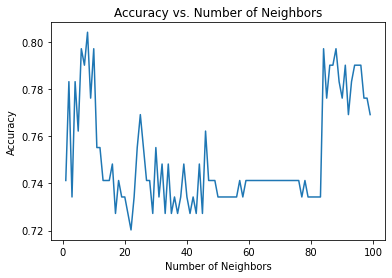

In [19]:
# Plot the accuracy scores
plt.plot(neighbors, accuracy_scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.show()

## Experimenting and Improving

Let's try improving our model's accuracy by experimenting with different numbers of neighbors. Duplicate the cell below twice, and change the k value to 1, 8, 20, and 85. Run each cell and compare the accuracy of the model at different k values. How does the k value influence how accurate the model is?

In [20]:
# Set the value of 'k', which represents the number of neighbors to consider for each prediction
k = 5

# Create an instance of the KNN classifier
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the KNN classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Evaluate the performance of the KNN model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7622377622377622
